In [ ]:
import pandas as pd
import numpy as np
import sys
import matplotlib as plt

from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:

# ----------Testing----------
# pd.set_option("display.max_rows", None, "display.max_columns", None)
# np.set_printoptions(threshold=sys.maxsize)

DataSet = pd.read_csv(r'labeled_data.csv')
# ----------Testing----------
# print(DataSet.head())
# print(DataSet.info())
# print(DataSet.describe().T)
DataSet.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [ ]:
dt_transformed = DataSet[['class','tweet']]
y = dt_transformed.iloc[:, :-1].values


In [ ]:
#encoding the dependent variable
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])])
y = np.array(ct.fit_transform(y))

y= [[0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


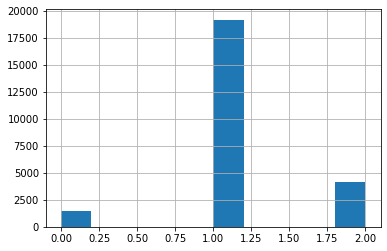

In [ ]:
DataSet['class'].hist()
print('y=',y)


In [ ]:
#up uptil this point the data has been slpit into 2 variables that will be used to fit hate speech and offensive speech models
y_df = pd.DataFrame(y)
y_hate = np.array(y_df[0])
y_offensive = np.array(y_df[1])
y_neither = np.array(y_df[2])


In [ ]:
# ----------Testing----------
#print(y_hate)
#print(y_offensive)


#cleaning the texts
corpus = []
for i in range(0, 24783):
    review = re.sub('[^a-zA-Z]', ' ', dt_transformed['tweet'][i])
    review = review.lower()
    review = review.split()
    ps=PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)
    
    # ----------Testing----------
# print(corpus)

cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(corpus).toarray()

In [ ]:
#splitting data into training set 70% and test set 30%
x_train , x_test , y_train , y_test = train_test_split(x, y_hate, test_size=0.30, random_state= 0)


In [ ]:
#naive bayes
classifier_np = GaussianNB()
classifier_np.fit(x_train, y_train)

GaussianNB()

In [ ]:
#logistic regression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
#svm classifier
from sklearn import svm

classifier_svm = svm.SVC()
classifier_svm.fit(x_train, y_train)

SVC()

In [ ]:
#making confusion matrix for each model


#naive bayes
y_pred_np = classifier_np.predict(x_test)
cm= confusion_matrix(y_test, y_pred_np)
print(cm)

report = classification_report( y_test, y_pred_np )
print(report)

[[3289 3719]
 [ 168  259]]
              precision    recall  f1-score   support

         0.0       0.95      0.47      0.63      7008
         1.0       0.07      0.61      0.12       427

    accuracy                           0.48      7435
   macro avg       0.51      0.54      0.37      7435
weighted avg       0.90      0.48      0.60      7435



In [ ]:
#SVM
y_pred_svm = classifier_svm.predict(x_test)
cm= confusion_matrix(y_test, y_pred_svm)
print(cm)

report_svm = classification_report( y_test, y_pred_svm )
print(report_svm)

[[6964   44]
 [ 372   55]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      7008
         1.0       0.56      0.13      0.21       427

    accuracy                           0.94      7435
   macro avg       0.75      0.56      0.59      7435
weighted avg       0.93      0.94      0.93      7435



In [ ]:
#logistic regression
y_pred_lr = classifier_lr.predict(x_test)
cm = confusion_matrix(y_test, y_pred_lr)
print(cm)

report_lr = classification_report( y_test, y_pred_lr )
print(report_lr)

[[6911   97]
 [ 347   80]]
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      7008
         1.0       0.45      0.19      0.26       427

    accuracy                           0.94      7435
   macro avg       0.70      0.59      0.62      7435
weighted avg       0.92      0.94      0.93      7435



In [ ]:
# the final evaluation by looking ta accuracies
svm_score=accuracy_score(y_test, y_pred_svm)
lr_score=accuracy_score(y_test, y_pred_lr)
np_score=accuracy_score(y_test, y_pred_np)


print('svm accuracy:', str(svm_score))
print('lr accuracy:', str(lr_score))
print('np accuracy:', str(np_score))

svm accuracy: 0.9440484196368527
lr accuracy: 0.9402824478816408
np accuracy: 0.4772024209818426
